# Classificação

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
## lendo o dataset

import pandas as pd
df = pd.read_csv('data/decision_tree_example - Página1.csv')
df.head()

,Filme,Ator,Categoria,Avaliação,Assistiu?
0,Bastador Inglórios,Brad Pitt,Ação,Mediana,Não
1,Porcos e Diamantes,Brad Pitt,Ação,Mediana,Não
2,Tróia,Brad Pitt,Ação,Baixa,Não
3,O curioso caso de Benjamin Button,Brad Pitt,Drama,Mediana,Não
4,Sr e Sra Smith,Brad Pitt,Romance,Baixa,Não


In [3]:
x = df.drop(['Filme','Assistiu?'],axis=1)
y = df['Assistiu?']

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder

In [5]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

ValueError: could not convert string to float: 'Brad Pitt'

In [ ]:
ohe = OneHotEncoder(categories='auto')
x_ohe = ohe.fit_transform(x).todense()

In [ ]:
ohe.categories_

In [6]:
columns = []

for arr in ohe.categories_:
    for value in arr:
        columns.append(value)

NameError: name 'ohe' is not defined

In [7]:
new_x = pd.DataFrame(x_ohe,columns=columns)
new_x

NameError: name 'x_ohe' is not defined

In [8]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=53)
dt.fit(new_x,y)

NameError: name 'new_x' is not defined

In [9]:
dt.classes_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'classes_'

In [10]:
import graphviz

# dot is a graph description language
dot = export_graphviz(dt, out_file=None, 
                           feature_names=new_x.columns.values,  
                           class_names=["não", "sim"],  
                           filled=True, rounded=True,  
                           special_characters=True) 

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot) 
graph

NameError: name 'new_x' is not defined

In [11]:
new_x.columns

NameError: name 'new_x' is not defined

In [12]:
## predizendo filme do brad pitt de drama com avaliação baixa

dt.predict([[1,0,0,0,1,0,0,0,1]])

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Random Forest
___

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(new_x,y)

NameError: name 'new_x' is not defined

In [15]:
rf.predict([[1,0,0,0,1,0,1,0,0]])

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Confusion Matrix
___

In [16]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![dict](imgs/data_dict.jpg)

In [17]:
x = df[['Age','Fare','Sex']]
x.Age.fillna(value=df.Age.mean(),inplace=True)
y = df.Survived

In [18]:
x

,Age,Fare,Sex
0,22.000000,7.2500,male
1,38.000000,71.2833,female
2,26.000000,7.9250,female
3,35.000000,53.1000,female
4,35.000000,8.0500,male
...,...,...,...
886,27.000000,13.0000,male
887,19.000000,30.0000,female
888,29.699118,23.4500,female
889,26.000000,30.0000,male


In [19]:
mmsc = MinMaxScaler()
x['Age'] = mmsc.fit_transform(x[['Age']])
x['Fare'] = mmsc.fit_transform(x[['Fare']])

In [20]:
ohe = OneHotEncoder()
ohe_data = ohe.fit_transform(x[['Sex']]).todense()

In [21]:
x['female'] = ohe_data[:,0]
x['male'] = ohe_data[:,1]

In [22]:
x.drop(['Sex'],axis=1,inplace=True)

In [23]:
x

,Age,Fare,female,male
0,0.271174,0.014151,0.0,1.0
1,0.472229,0.139136,1.0,0.0
2,0.321438,0.015469,1.0,0.0
3,0.434531,0.103644,1.0,0.0
4,0.434531,0.015713,0.0,1.0
...,...,...,...,...
886,0.334004,0.025374,0.0,1.0
887,0.233476,0.058556,1.0,0.0
888,0.367921,0.045771,1.0,0.0
889,0.321438,0.058556,0.0,1.0


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [25]:
rf = RandomForestClassifier(n_estimators=500,max_depth=5)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

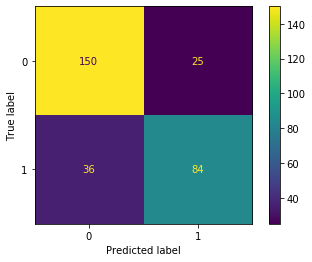

In [26]:
plot_confusion_matrix(rf, x_test, y_test);

In [27]:
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       175
           1       0.77      0.70      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

